# Constructing a Polynomial Regression: An Example

In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


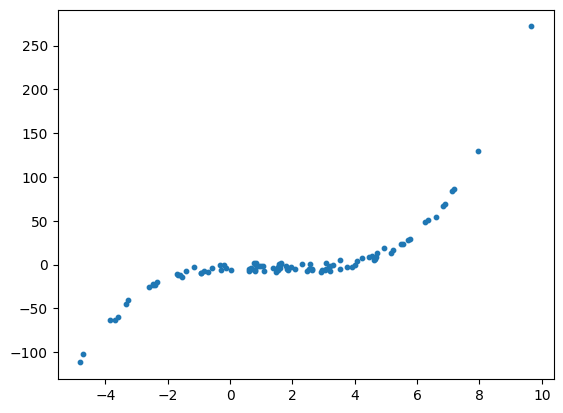

In [10]:
#Building a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis] #Why need this?
y = y[:, np.newaxis] #Why need this?
plt.scatter(x,y, s=10)
plt.show()

## Linear Regression

In [11]:
#spliting the data [80:20]
#set of 20
#len x and y is 100
x_train = x[:-20] #size 80
y_train = y[:-20]

x_test = x[-20:] #size 20
y_test = y[-20:]


Model weights: 
[[11.4160685]]


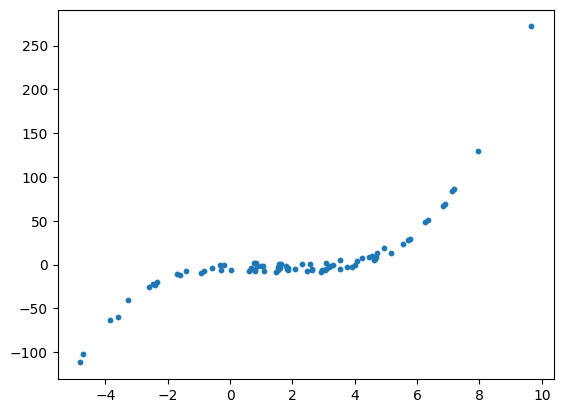

In [43]:
model = LinearRegression()
model.fit(x_train, y_train) #model is a object, feed in the training data.
print("Model weights: ")
print(model.coef_)
#here, we call predict on the training set because we want to see the fit of the model on the training set.
yhat_train_pred = model.predict(x_train)
yhat_test_pred = model.predict(x_test)

# Let's plot our subset of data in this case 80% of our data. 
# Does it look the same as above?
plt.scatter(x_train, y_train, s=10)
plt.show()


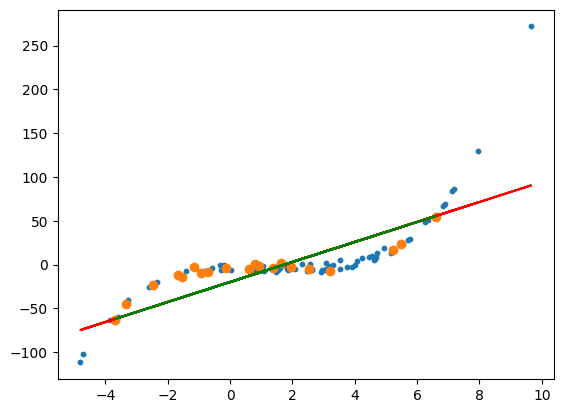

In [16]:
# Here we plot our regression line
# How does it fit? we can evaluate our MSE but also simply see that we can do better!
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, yhat_train_pred, color='r')
plt.plot(x_test, yhat_test_pred, color='g')
plt.scatter(x_test, y_test)
plt.show()

In [17]:
# Let's check our error
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
rmse2 = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_train,yhat_train_pred)
r22 = r2_score(y_test,yhat_test_pred)

print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

print('Training RMSE: %8.15f' % rmse2)
print('Training R2: %8.15f' % r22)

Training RMSE: 27.823345591088774
Training R2: 0.605330642166617
Training RMSE: 17.397646191160849
Training R2: 0.421299699834791


In [234]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 17.397646191160849
Training R2: 0.421299699834791


## Constructing a 2nd order Polynomail Regression

In [245]:
#Rebuilding a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [26]:
#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. For example, 
## if an input sample is two dimensional and of the form [a, b], 
## the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2]')
print(x_poly)

Polynomial Features: [1,x,x**2]
[[ 1.00000000e+00 -3.29215704e+00  1.08382980e+01]
 [ 1.00000000e+00  7.99528375e-01  6.39245622e-01]
 [ 1.00000000e+00 -9.36213952e-01  8.76496565e-01]
 [ 1.00000000e+00 -4.72267960e+00  2.23037026e+01]
 [ 1.00000000e+00 -3.60267397e+00  1.29792597e+01]
 [ 1.00000000e+00  4.93183364e+00  2.43229830e+01]
 [ 1.00000000e+00 -8.50265253e-01  7.22951000e-01]
 [ 1.00000000e+00  2.45407162e+00  6.02246754e+00]
 [ 1.00000000e+00  2.30965656e+00  5.33451340e+00]
 [ 1.00000000e+00  7.68204494e-01  5.90138145e-01]
 [ 1.00000000e+00  1.56786929e+00  2.45821410e+00]
 [ 1.00000000e+00 -2.36282052e+00  5.58292081e+00]
 [ 1.00000000e+00 -2.83113175e-01  8.01530701e-02]
 [ 1.00000000e+00  1.63497495e+00  2.67314309e+00]
 [ 1.00000000e+00  6.68410302e-01  4.46772332e-01]
 [ 1.00000000e+00  9.98977018e-01  9.97955082e-01]
 [ 1.00000000e+00 -2.48223722e+00  6.16150161e+00]
 [ 1.00000000e+00  2.61547479e+00  6.84070838e+00]
 [ 1.00000000e+00  1.06079690e+00  1.12529005e+00]

In [27]:
#Subset the data
x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [28]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

Model weights: 
[[0.         7.22599268 1.0992131 ]]


In [29]:
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 24.395169585394576
Training R2: 0.696595238721916


In [30]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 18.958147188630612
Training R2: 0.312829511125536


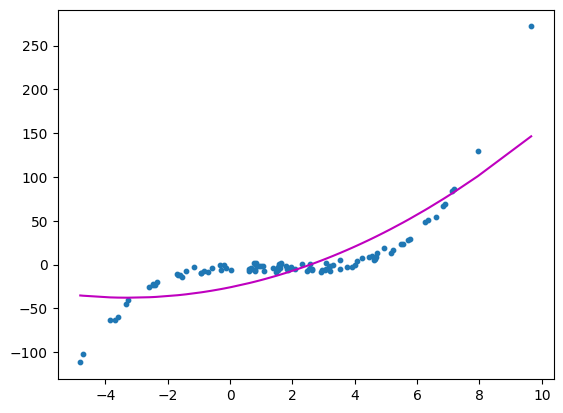

In [31]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()

## Polynomial Regresion 3rd order

In [257]:
#Building a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [32]:
#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2,x**3]')
print(x_poly[0])

Polynomial Features: [1,x,x**2,x**3]
[  1.          -3.29215704  10.83829796 -35.68137892]


In [33]:
# subset the data
x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [34]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

Model weights: 
[[ 0.          0.90216542 -2.01095101  0.50074037]]


In [35]:
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 2.991353849540037
Training R2: 0.995438052457929


In [36]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 3.431740027623191
Training R2: 0.977483469140174


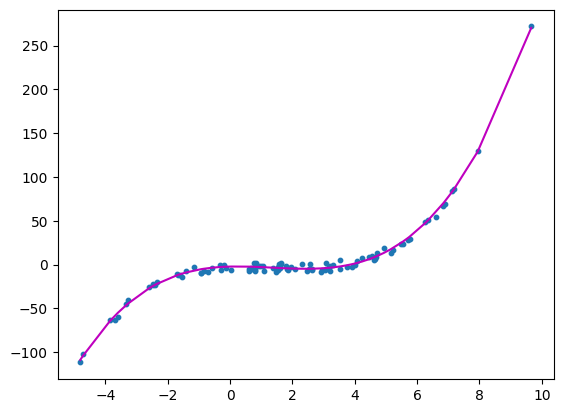

In [37]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()

## Multiorder polynomial

In [38]:
#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=15)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [39]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

Model weights: 
[[ 0.00000000e+00  8.61227256e-01 -5.56886282e-01  7.93181468e-01
  -4.68692325e-01 -8.48028084e-02  8.64618514e-02  3.43521367e-03
  -7.72695787e-03  5.67112771e-04  2.84023083e-04 -4.78462773e-05
  -1.55493379e-06  9.33571379e-07 -7.99616690e-08  2.25756088e-09]]


In [40]:
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 2.823489794162600
Training R2: 0.995935686934580


In [41]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 3.093358240851434
Training R2: 0.981704968759582


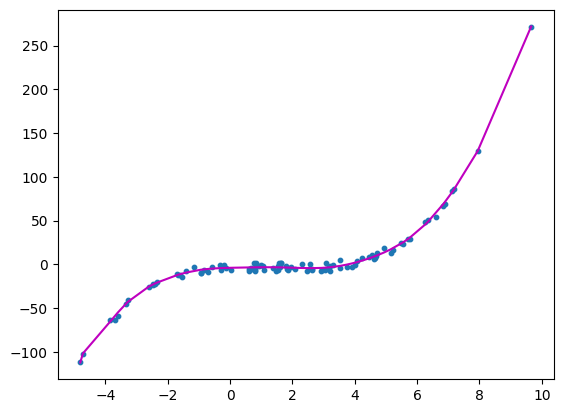

In [42]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()